# Análise exploratória de dados

## 1. Descrição dos dados

### 1.1 Configurações iniciais

In [61]:
#Importações de bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.data import visualize, prepare

In [62]:
colors = ["#20B2AA", "#B22028"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

In [63]:
data_path = Path('../data/raw/data.csv')
df = pd.read_csv(data_path) #Obtendo o dataset

df.head() #Visualizando as 5 primeiras linhas do dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [64]:
df.info()

#Para manter o padrão com o dicionário de dados
df.rename(columns={'FATIGUE ': 'FATIGUE'}, inplace=True)
df.rename(columns={'ALLERGY ': 'ALLERGY'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### 1.2 Dicionário de dados

In [65]:
data_path = Path('../data/external/dicionario.csv')
df_dict = pd.read_csv(data_path, sep=';') #Obtendo o dataset

df_dict

,Variavel,Significado,Tipo
0,GENDER,Indica o genêro do paciente,Nominal
1,AGE,Indica a idade do paciente,Discreta
2,SMOKING,Indica se o paciente é fumante,Nominal
3,YELLOW_FINGERS,Indica se o paciente possui as extremidades do...,Nominal
4,ANXIETY,Indica se o paciente apresenta sinais de trans...,Nominal
5,PEER_PRESSURE,"Indica se o paciente, por volta da adolescenci...",Nominal
6,CHRONIC DISEASE,Indica se o paciente possui alguma comorbidade...,Nominal
7,FATIGUE,Indica se o paciente apresenta sinais de cansa...,Nominal
8,ALLERGY,Indica se o paciente possui alergia a fumaça d...,Nominal
9,WHEEZING,Indica se o paciente apresenta um chiado no pu...,Nominal


#### 1.2.1 Agrupamento de variáveis

|Grupo                |Variáveis                                                                     
|---------------------|---------------------------------------------------------------------------------
|`Sintoma`            |`SMOKING`, `YELLOW_FINGERS`, `ANXIETY`, `PEER_PRESSURE`, `CHRONIC DISEASE`, `FATIGUE`,  `ALLERGY`, `WHEEZING`, `ALCOHOL CONSUMING`, `COUGHING`, `SHORTNESS OF BREATH`, `SWALLOWING DIFFICULTY`, `CHEST PAIN`                                                    
|`Identificação`      |`AGE`, `GENDER`

**Nota:** `LUNG_CANCER` não foi incluída em nenhum grupo pois é a variável alvo.

In [66]:
df_dict = df_dict.assign(
    Grupo = df_dict.apply(prepare.group_separation, axis=1)
)
columns_by_group = {
    group: df_dict.query("Grupo == @group").Variavel.to_list()
    for group in df_dict.Grupo.unique()
}
df_dict

,Variavel,Significado,Tipo,Grupo
0,GENDER,Indica o genêro do paciente,Nominal,Identificação
1,AGE,Indica a idade do paciente,Discreta,Identificação
2,SMOKING,Indica se o paciente é fumante,Nominal,Sintoma
3,YELLOW_FINGERS,Indica se o paciente possui as extremidades do...,Nominal,Sintoma
4,ANXIETY,Indica se o paciente apresenta sinais de trans...,Nominal,Sintoma
5,PEER_PRESSURE,"Indica se o paciente, por volta da adolescenci...",Nominal,Sintoma
6,CHRONIC DISEASE,Indica se o paciente possui alguma comorbidade...,Nominal,Sintoma
7,FATIGUE,Indica se o paciente apresenta sinais de cansa...,Nominal,Sintoma
8,ALLERGY,Indica se o paciente possui alergia a fumaça d...,Nominal,Sintoma
9,WHEEZING,Indica se o paciente apresenta um chiado no pu...,Nominal,Sintoma


### 1.3 Dados faltantes

In [67]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [68]:
for index, row in df_dict.iterrows():
    var = row['Variavel']
    print(var, df[var].unique())

GENDER ['M' 'F']
AGE [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING [1 2]
YELLOW_FINGERS [2 1]
ANXIETY [2 1]
PEER_PRESSURE [1 2]
CHRONIC DISEASE [1 2]
FATIGUE [2 1]
ALLERGY [1 2]
WHEEZING [2 1]
ALCOHOL CONSUMING [2 1]
COUGHING [2 1]
SHORTNESS OF BREATH [2 1]
SWALLOWING DIFFICULTY [2 1]
CHEST PAIN [2 1]
LUNG_CANCER ['YES' 'NO']


Com isso, podemos verificar que não há dados faltantes no conjunto de dados.

### 1.4 Mapeamento de variáveis

Como visto no dicionário de dados, o conjunto se encontra em inglês, podemos mapear as variáveis para o português para facilitar a visualização dos dados.

In [69]:
#Traduzindo as variáveis para o português
df_view = df.copy()
dict_columns = {
    'GENDER': 'Gênero',
    'AGE': 'Idade',
    'SMOKING': 'Fumante',
    'YELLOW_FINGERS': 'Dedos amarelados',
    'ANXIETY': 'Ansiedade',
    'PEER_PRESSURE' : 'Pressão grupal',
    'CHRONIC DISEASE' : 'Doença crônica',
    'FATIGUE' : 'Fadiga',
    'ALLERGY' : 'Alergia',
    'WHEEZING' :  'Pieira',
    'ALCOHOL CONSUMING' : 'Consumo alcoólico',
    'COUGHING' : 'Tosse',
    'SHORTNESS OF BREATH' : 'Falta de ar',
    'SWALLOWING DIFFICULTY' : 'Dificuldade de ingestão',
    'CHEST PAIN' : 'Dor torácica',
    'LUNG_CANCER' : 'Câncer Pulmonar',
}

df_view.replace({'YES': 'Sim', 'NO': 'Não'}, inplace=True)
df_view.replace({1: 'Não', 2: 'Sim'}, inplace=True)

df_view.rename(columns=dict_columns, inplace=True)
df_view.head()

,Gênero,Idade,Fumante,Dedos amarelados,Ansiedade,Pressão grupal,Doença crônica,Fadiga,Alergia,Pieira,Consumo alcoólico,Tosse,Falta de ar,Dificuldade de ingestão,Dor torácica,Câncer Pulmonar
0,M,69,Não,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,M,74,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Sim
2,F,59,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Não,Sim,Não
3,M,63,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Sim,Sim,Não
4,F,63,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Sim,Não,Não,Não


## 2. Perguntas de partida e hipóteses

Com visualizações de informações gerais poderemos responder a perguntas do tipo:

- Qual a distribuição de gênero dos pacientes?
- Qual a quantidade de casos confirmados de cancer de pulmão?
- Qual a distribuição de idade dos pacientes?
- Qual a correlação entre os sintomas dos pacientes?
- Existem dados discrepantes no conjunto?
- Entre os casos confirmados de cancer de pulmão, qual a correlação de sintomas?

## 3. Insights

### 3.1 Distribuição de variáveis

##### 3.1.1 Distribuição de gênero

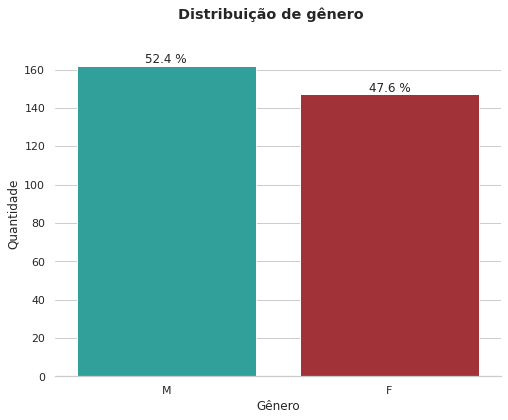

In [70]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
plt.suptitle('Distribuição de gênero', fontweight='bold')
visualize.variable_dist_count(df_view, 'Gênero')
plt.show()

#### 3.1.2 Distribuição de idade

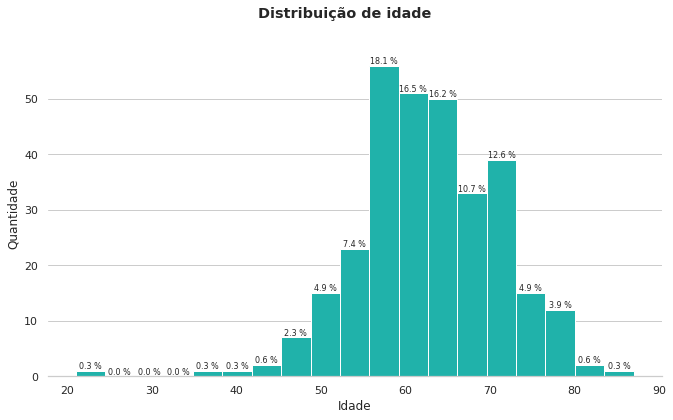

In [71]:
plt.figure(figsize=(11,6))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
plt.suptitle('Distribuição de idade', fontweight='bold')
visualize.variable_dist_histogram(df_view, 'Idade')
plt.show()

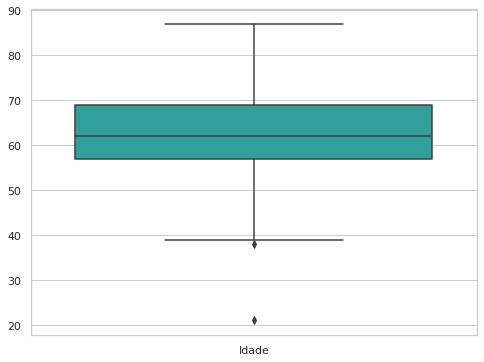

In [77]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df_view)
plt.show()

In [78]:
df_view['Idade'].unique()

array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
       21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
       79, 38, 39, 87, 46])

In [81]:
df_view[df_view['Idade'] == 21]

,Gênero,Idade,Fumante,Dedos amarelados,Ansiedade,Pressão grupal,Doença crônica,Fadiga,Alergia,Pieira,Consumo alcoólico,Tosse,Falta de ar,Dificuldade de ingestão,Dor torácica,Câncer Pulmonar
22,F,21,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não


#### 3.1.3 Distribuição de casos confirmados

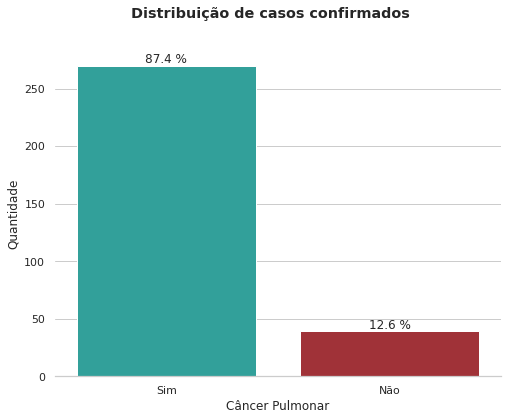

In [72]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
plt.suptitle('Distribuição de casos confirmados', fontweight='bold')
visualize.variable_dist_count(df_view, 'Câncer Pulmonar')
plt.show()

#### 3.1.4 Correlação de sintomas

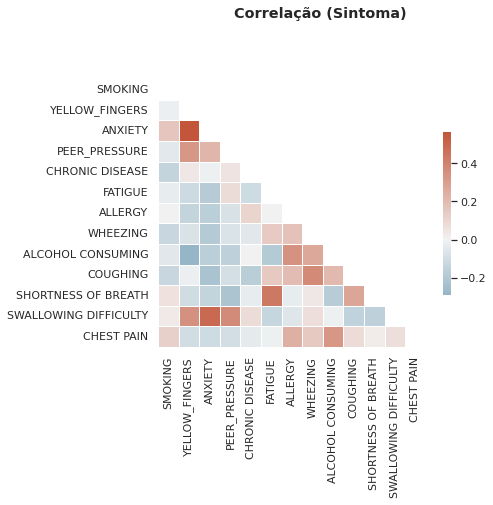

In [73]:
query_data = df.replace(["Não", "Sim"], [0, 1])

var_group = 'Sintoma'
visualize.correlation(query_data[columns_by_group[var_group]], var_group) 

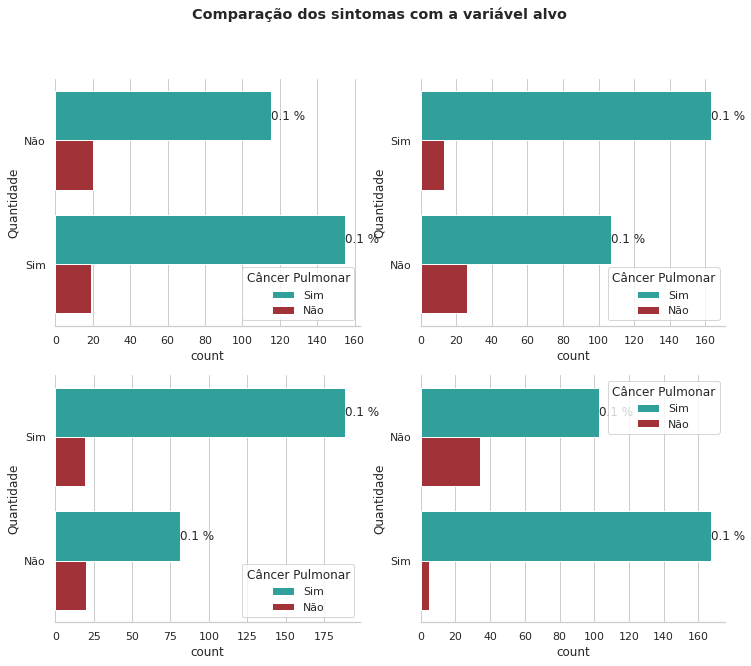

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
#plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Comparação dos sintomas com a variável alvo', fontweight='bold')
visualize.variable_dist_count(df_view, 'Fumante', axe=axes.flatten()[0], compare='Câncer Pulmonar', horizontal=True)
visualize.variable_dist_count(df_view, 'Dedos amarelados', axe=axes.flatten()[1], compare='Câncer Pulmonar', horizontal=True)
visualize.variable_dist_count(df_view, 'Fadiga', axe=axes.flatten()[2], compare='Câncer Pulmonar', horizontal=True)
visualize.variable_dist_count(df_view, 'Alergia', axe=axes.flatten()[3], compare='Câncer Pulmonar', horizontal=True)
plt.show()

In [ ]:
""" fig, axes = plt.subplots(2, 2, figsize=(18,10))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Informações gerais', fontweight='bold')
visualize.variable_dist_count(df_view, 'Fumante', axe=axes.flatten()[0])
visualize.variable_dist_count(df_view, 'Dedos amarelados', axe=axes.flatten()[1])
visualize.variable_dist_count(df_view, 'Fadiga', axe=axes.flatten()[2])
visualize.variable_dist_count(df_view, 'Alergia', axe=axes.flatten()[3])
plt.show() """

" fig, axes = plt.subplots(2, 2, figsize=(18,10))\nplt.tight_layout(pad=4, w_pad=10, h_pad=5)\nfig.suptitle('Informações gerais', fontweight='bold')\nvisualize.variable_dist_count(df_view, 'Fumante', axe=axes.flatten()[0])\nvisualize.variable_dist_count(df_view, 'Dedos amarelados', axe=axes.flatten()[1])\nvisualize.variable_dist_count(df_view, 'Fadiga', axe=axes.flatten()[2])\nvisualize.variable_dist_count(df_view, 'Alergia', axe=axes.flatten()[3])\nplt.show() "

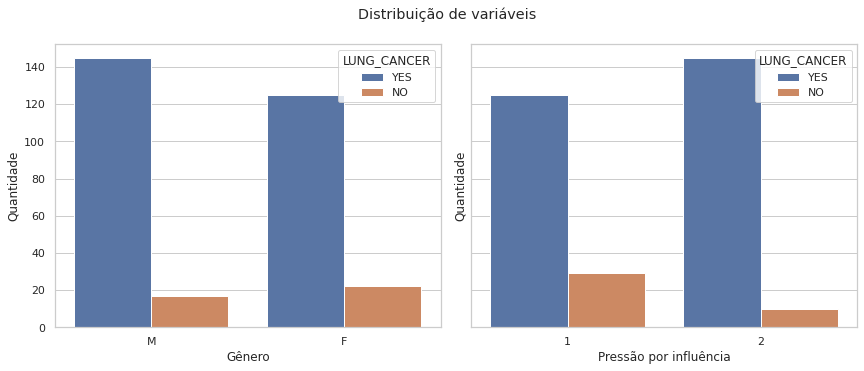

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
fig.suptitle('Distribuição de variáveis')
fig.tight_layout()
sns.countplot(ax=axes[0], x=df['GENDER'], data=df, hue=df['LUNG_CANCER'])
sns.countplot(ax=axes[1], x=df['PEER_PRESSURE'], data=df, hue=df['LUNG_CANCER'])
axes[0].set(xlabel="Gênero", ylabel="Quantidade")
axes[1].set(xlabel="Pressão por influência", ylabel="Quantidade")
plt.show()

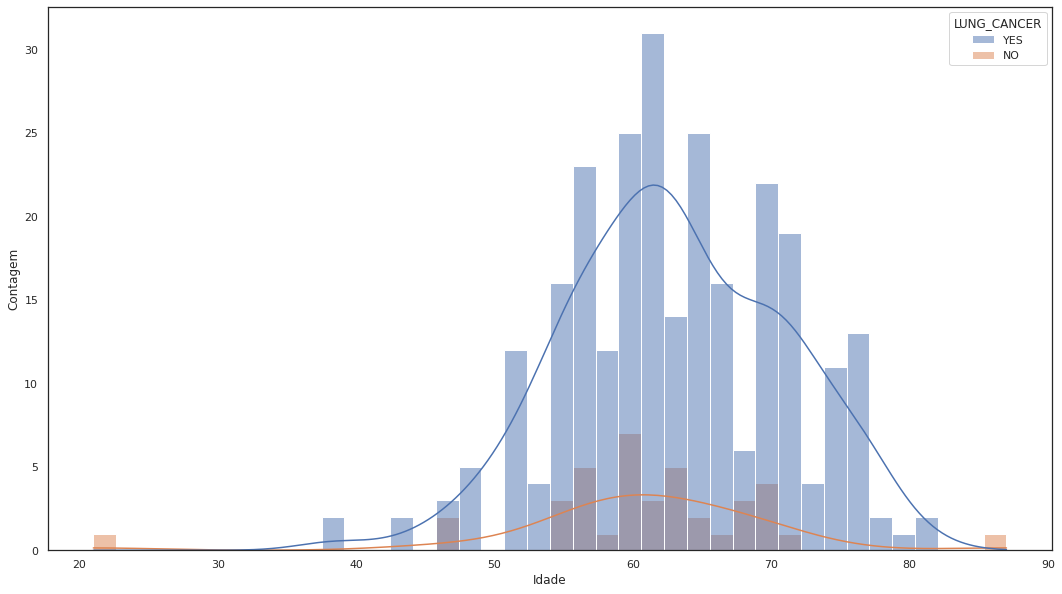

In [ ]:
plt.figure(figsize=(18,10))
sns.set_theme(style="white") #Removendo o whitegrid para esse gráfico
ax = sns.histplot(data=df, x='AGE', bins=40, kde=True, hue=df['LUNG_CANCER'])
ax.set(xlabel='Idade', ylabel='Contagem')
plt.show()